In [1]:
# linear algebra
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
# mpl.style.use('ggplot')
# sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8


-------------------------


In [2]:
# Get the data
import pandas as pd

sub_df = pd.read_csv("/content/test.csv")
df = pd.read_csv("/content/train.csv")
# df = pd.concat([train_df, test_df])

df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [3]:
print('Descriptive statistics of train_df:\n')
df.describe(include = 'all')


Descriptive statistics of train_df:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
sub_df.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape, sub_df.shape


((891, 12), (418, 11))

In [8]:
#Find the number duplicate record
print('df - Number of duplicate Record:', df.duplicated().sum())

print('sub_df - Number of duplicate Record:', sub_df.duplicated().sum())


df - Number of duplicate Record: 0
sub_df - Number of duplicate Record: 0


In [9]:
#Find the number of null per each columns
print('Columns in df with null values:\n')
print(df)
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)


Columns in df with null values:

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                  

In [10]:
combine = [df, sub_df]


In [11]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


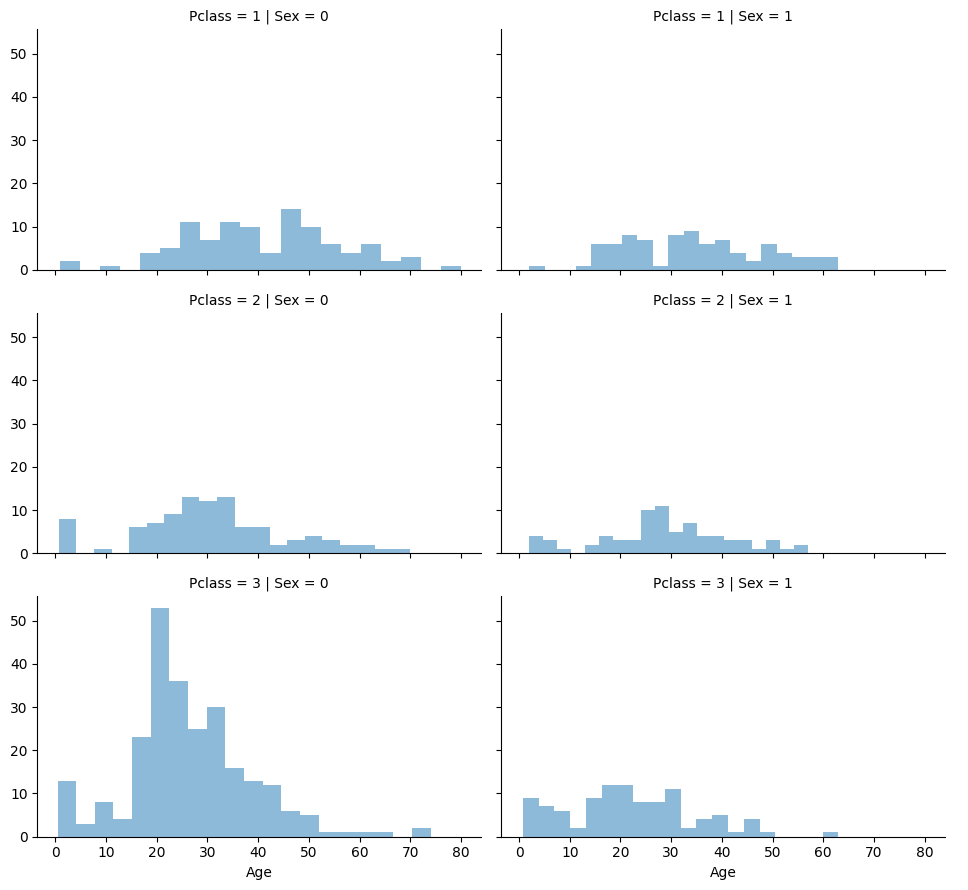

In [14]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [15]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [16]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [17]:
#Find the value count of train_df['Embarked']
print('Value count of Embarked variable in train_df:\n')
print(df['Embarked'].value_counts())
print("-"*30)

# Find the mode of train_df['Embarked']
freq_port = df.Embarked.dropna().mode()[0]
print('Mode of Embarked variable in train_df: ',freq_port)


Value count of Embarked variable in train_df:

S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------------------------
Mode of Embarked variable in train_df:  S


In [18]:
#Fill the null value of Embarked with the most common occurance

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [19]:
#Converting categorical feature to numeric

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 1, "C": 2, "Q": 3})

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,1


In [20]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)


In [21]:
for dataset in combine:
    dataset['Title']  = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [22]:
pd.crosstab(df["Title"], sub_df['Sex'])


Sex,0,1
Title,,
Don,1,0
Dr,3,0
Master,14,9
Miss,64,37
Mme,1,0
Mr,145,83
Mrs,37,21
Rev,1,2


In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1


In [25]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str.slice(0,1)
    dataset['Deck'] = dataset['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6,"G":7, "T":8})
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)


In [26]:
#Find the number of null per each columns
print('Columns in df with null values:\n')
print(df.isnull().sum())
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)


Columns in df with null values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------
Columns in sub_df with null values:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------


In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1


In [29]:
#Duplicate variable - Fare & Age
# for dataset in combine:
#     dataset['FareB'] = dataset['Fare']
#     dataset['AgeB'] = dataset['Age']


In [30]:
#Binning variable - Fare & Age
for dataset in combine:
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


In [31]:
# for dataset in combine:
#     dataset.loc[ dataset['FareB'] <= 7.91, 'FareB'] = 0
#     dataset.loc[(dataset['FareB'] > 7.91) & (dataset['FareB'] <= 14.454), 'FareB'] = 1
#     dataset.loc[(dataset['FareB'] > 14.454) & (dataset['FareB'] <= 31), 'FareB']   = 2
#     dataset.loc[ dataset['FareB'] > 31, 'FareB'] = 3
#     dataset['FareB'] = dataset['FareB'].astype(int)

combine = [df, sub_df]

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"
5,6,0,3,"Moran, Mr. James",0,25,0,0,330877,8,NaN,3,1,0,1,1,"(7.0, 14.0]","(16.0, 32.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51,E46,1,1,5,1,1,"(31.0, 512.0]","(48.0, 64.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21,NaN,1,4,0,5,0,"(14.0, 31.0]","(-0.08, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11,NaN,1,3,0,3,0,"(7.0, 14.0]","(16.0, 32.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30,NaN,2,3,0,2,0,"(14.0, 31.0]","(-0.08, 16.0]"


In [32]:
for dataset in combine:
    #Fare Bins/Buckets using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


In [33]:
# for dataset in combine:
#     dataset.loc[ dataset['AgeB'] <= 16, 'AgeB'] = 0
#     dataset.loc[(dataset['AgeB'] > 16) & (dataset['AgeB'] <= 32), 'AgeB'] = 1
#     dataset.loc[(dataset['AgeB'] > 32) & (dataset['AgeB'] <= 48), 'AgeB'] = 2
#     dataset.loc[(dataset['AgeB'] > 48) & (dataset['AgeB'] <= 64), 'AgeB'] = 3
#     dataset.loc[ dataset['AgeB'] > 64, 'AgeB'] = 4
# train_df.head()

combine = [df, sub_df]
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"


In [34]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in combine:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(df[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone
0,0,3,1,1,1,0,22,7,2,0
1,1,1,2,3,1,0,38,71,2,0
2,1,3,1,2,0,0,26,7,1,1
3,1,1,1,3,1,0,35,53,2,0
4,0,3,1,1,0,0,35,8,1,1


In [35]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
sub_df = sub_df.drop(['Name','Ticket','Cabin'], axis=1)

combine = [df, sub_df]
df.shape, sub_df.shape


((891, 19), (418, 19))

In [36]:
## check for data type
print("Training Data:\n")
df.head()


Training Data:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


In [37]:
## check for data type
print("Testing Data:\n")
df.head()



Testing Data:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


In [51]:
eda_df = df.copy()
eda_df['Sex'] =  eda_df['Sex'].map( { 0: 'male',1:'female'} )
eda_df['Deck'] =  eda_df['Deck'].map( {0: 'Missing', 1: 'A', 2: 'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'T'} )
eda_df['Embarked'] =  eda_df['Embarked'].map( {0: 'Missing', 1: 'S', 2: 'C',3:'Q'} )
eda_df['Title'] =  eda_df['Title'].map( {0: 'Missing', 1: 'Mr', 2: 'Miss',3:'Mrs',4:'Master',5:'Rare'} )
# eda_df['Survived'] =  eda_df['Survived'].map( {0: 'No',1:'Yes'} )
eda_df['Pclass'] =  eda_df['Pclass'].map( {0: 'Missing',1:'Upper',2:'Middle',3:'Lower'} )
eda_df['IsAlone'] =  eda_df['IsAlone'].map( {0: 'No',1:'Yes'} )


In [52]:
import seaborn as sns

fig1 = eda_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().fillna(0)
fig2 = eda_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().fillna(0)
fig3 = eda_df.groupby(['IsAlone', 'Survived'])['Survived'].count().unstack().fillna(0)
fig4 = eda_df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack().fillna(0)


In [53]:
colors = ['#2471A3', '#F5B041']

def stacked_barchart(fig,ax):
    bottom = np.zeros(len(fig))

    for i, col in enumerate(fig.columns):
        ax.bar(
          fig.index, fig[col], bottom=bottom, label=col, color=colors[i])
        bottom += np.array(fig[col])

    totals = fig.sum(axis=1)
    y_offset = 4
    for i, total in enumerate(totals):
        ax.text(totals.index[i], total + y_offset, round(total), ha='center',
              weight='bold')

    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -40

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height() + bar.get_y() + y_offset,
          # This is actual value we'll show.
          round(bar.get_height()),
          # Center the labels and style them a bit.
          ha='center',
          color='w',
          weight='bold',
          size=8
      )

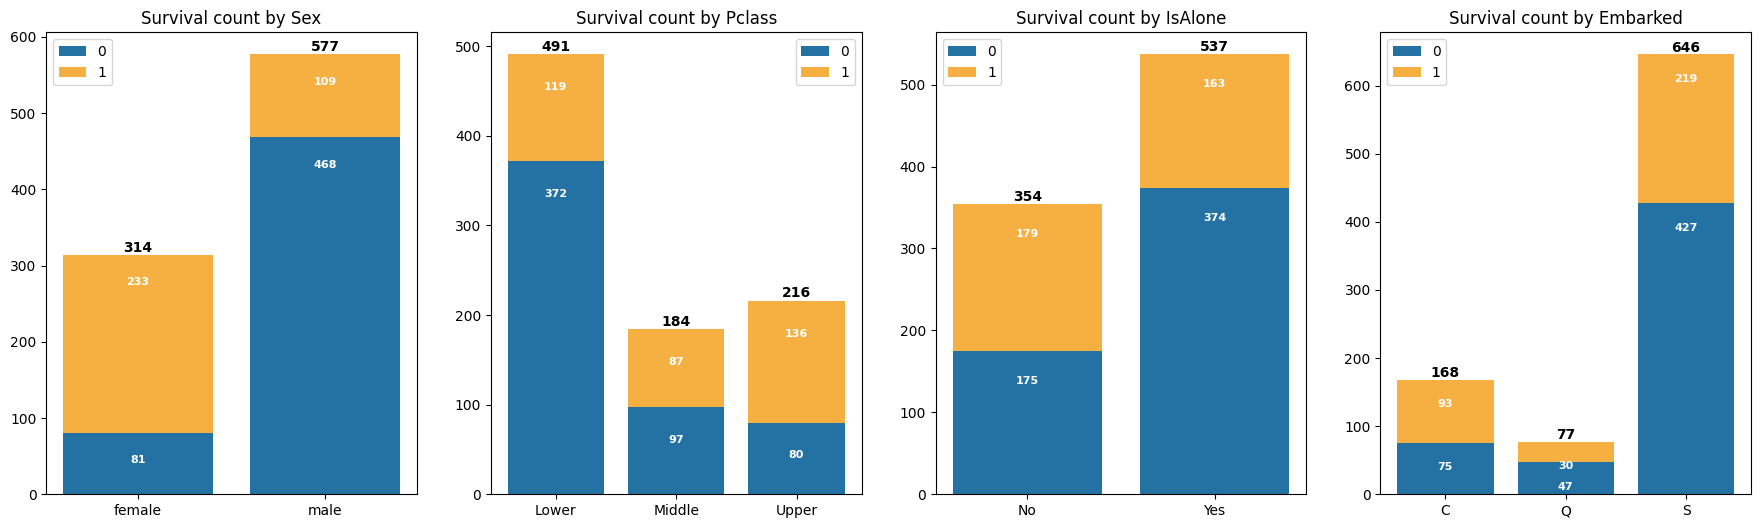

In [54]:
fig,ax=plt.subplots(1,4,figsize=(22,6))

stacked_barchart(fig1,ax[0])
ax[0].set_title('Survival count by Sex')
ax[0].legend()

stacked_barchart(fig2,ax[1])
ax[1].set_title('Survival count by Pclass')
ax[1].legend()

stacked_barchart(fig3,ax[2])
ax[2].set_title('Survival count by IsAlone')
ax[2].legend()

stacked_barchart(fig4,ax[3])
ax[3].set_title('Survival count by Embarked')
ax[3].legend()

plt.show()


In [55]:
display(df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze FamilySize feature with survived
display(df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Pclass feature with survived
display(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze sex feature with survived
display(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze SibSp feature with survived
display(df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze Parch feature with survived
display(df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
## Analyze IsAlone feature with survived
display(df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))


,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
1,1,0.742038
0,0,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [61]:
pd.crosstab([eda_df.Sex,eda_df.Survived],eda_df.Pclass,margins=True)


Pclass           Lower  Middle  Upper  All
Sex    Survived                           
female 0            72       6      3   81
       1            72      70     91  233
male   0           300      91     77  468
       1            47      17     45  109
All                491     184    216  891

In [62]:
!pip install seaborn

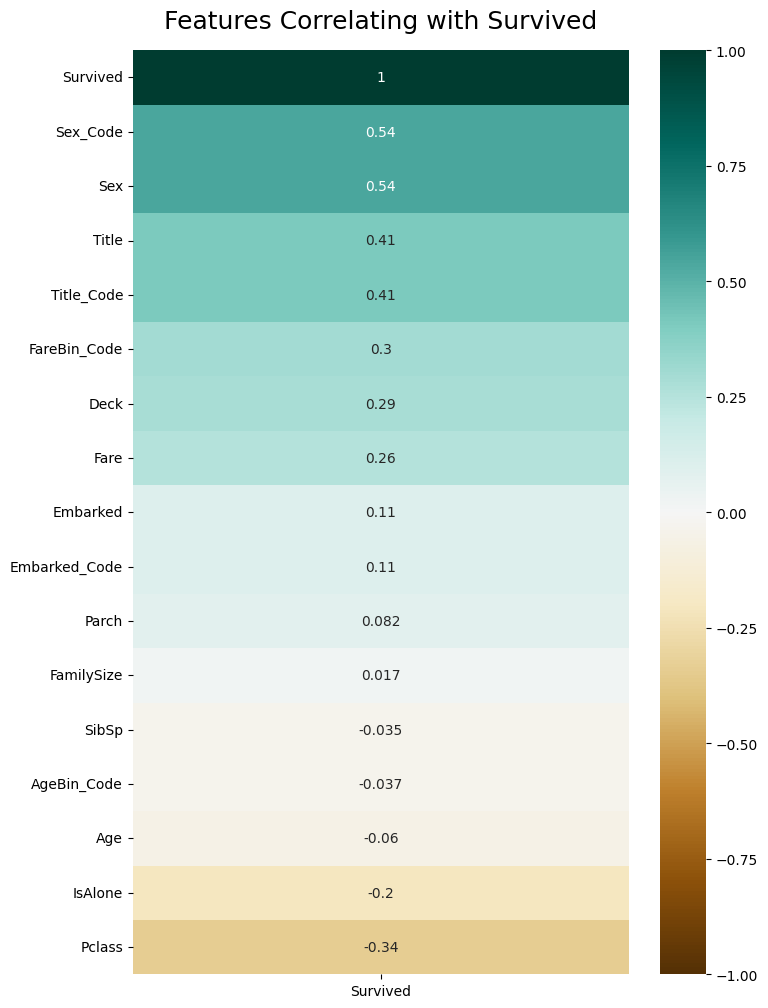

In [64]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);


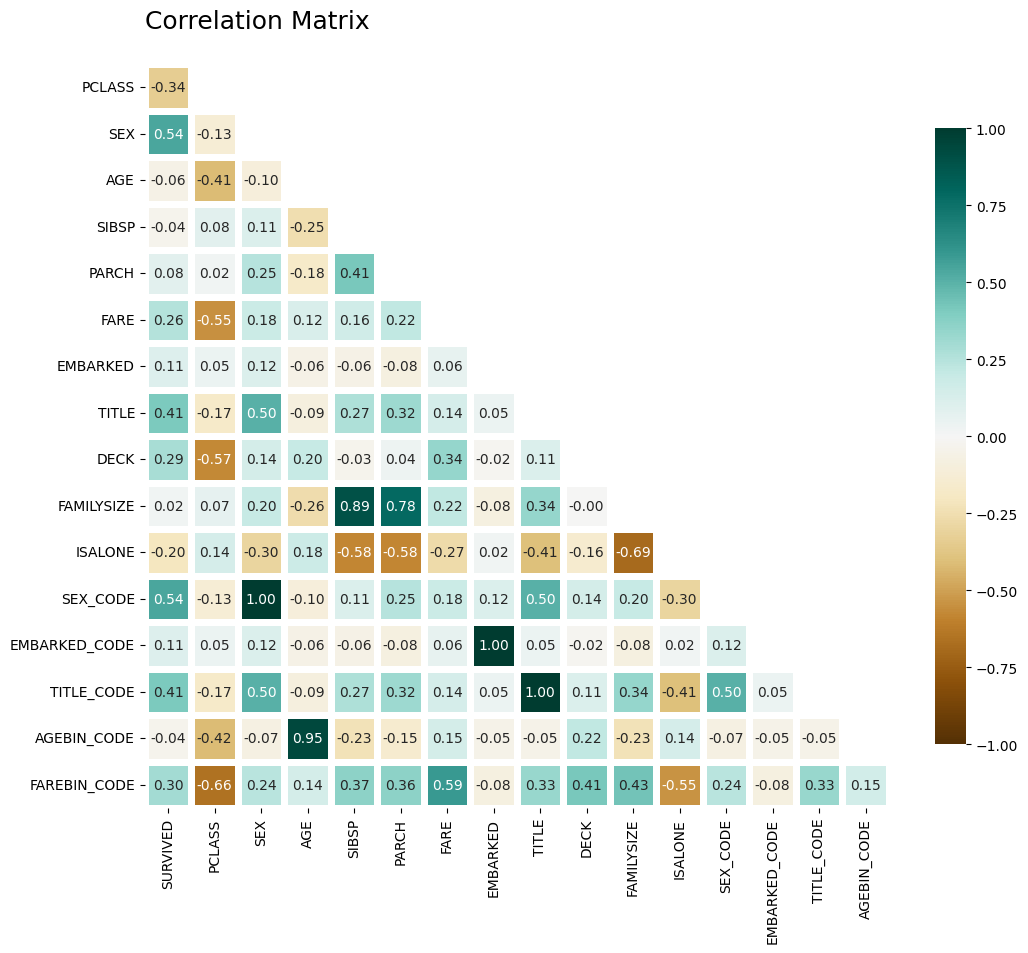

In [65]:
# get correlations
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           linewidths=5, cmap='BrBG', vmin=-1, vmax=1,
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()


In [66]:
df = df.drop(['AgeBin'], axis=1)
df = df.drop(['FareBin'], axis=1)
sub_df = sub_df.drop(['AgeBin'], axis=1)
sub_df = sub_df.drop(['FareBin'], axis=1)



In [67]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = sub_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 16), (891,), (418, 16))

In [68]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [69]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(df[data1_x_calc], df[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(df[data1_x_bin], df[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], df[Target], random_state = 0)


print("Data1 Shape: {}".format(df.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()


Data1 Shape: (891, 17)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,0,3,0,0,1,1,0
68,1,3,0,1,7,1,0
253,0,3,0,0,2,1,2
320,0,3,0,0,1,1,0
706,1,2,0,2,1,2,1


In [70]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df[data1_x_bin], df[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


    #save MLA predictions - see section 6 for usage
    alg.fit(df[data1_x_bin], df[Target])
    MLA_predict[MLA_name] = alg.predict(df[data1_x_bin])

    row_index+=1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893071,0.830224,0.063174,0.164386
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.8897,0.829851,0.063757,0.045234
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.867228,0.828358,0.038453,0.264391
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834457,0.827612,0.048484,0.076449
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.868352,0.826119,0.051346,0.107371
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.893071,0.823134,0.072407,0.236297
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.888202,0.823134,0.053498,0.08477
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.829213,0.822388,0.051832,0.08138
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.855618,0.817164,0.060489,0.005203
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.822285,0.815672,0.052073,0.214562


Text(0, 0.5, 'Algorithm')

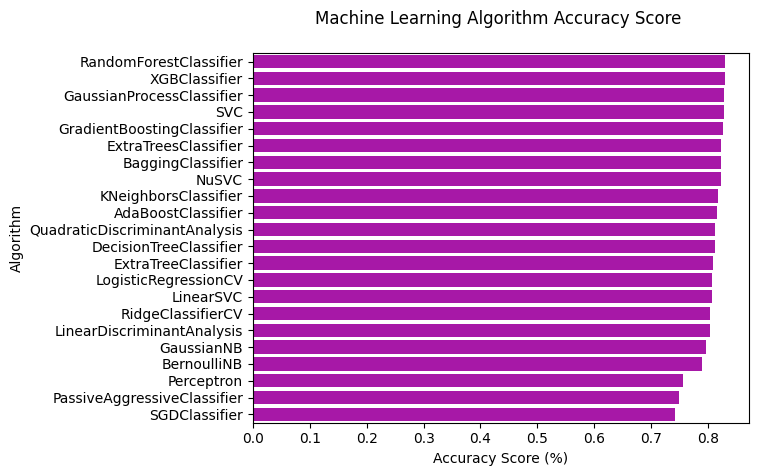

In [71]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')


In [72]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions for test data
Y_pred = model.predict(X_test)


In [73]:
submission = pd.DataFrame({
        "PassengerId": sub_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
